# Manual Test: Sonar Agent

This notebook allows for manual testing of the `sonar_agent` subgraph directly, bypassing the supervisor.

In [1]:
from dotenv import load_dotenv

# Load environment variables
load_dotenv(override=True)


True

In [2]:
from deep_research_with_langgraph.sonar_agent import sonar_researcher
from langchain_core.messages import HumanMessage
from IPython.display import display, Markdown

In [3]:
test_briefs = [
    "What are the latest advancements in solid-state batteries as of 2026? Focus on commercial viability and key players.",
    "Evaluate the current state of room-temperature superconductors in 2025. Include major breakthroughs and potential industrial applications.",
    "Analyze the impact of generative AI on software engineering productivity in 2026. Provide statistics and case studies from top tech firms.",
    "Research the development of carbon capture and storage (CCS) technologies in 2026, focusing on cost-efficiency and global adoption rates.",
    "Investigate the progress of nuclear fusion energy commercialization. Identify key startups and projected timelines for grid integration."
]

In [4]:
# Run the agent
test_brief = test_briefs[3]
print(f"Running Sonar Agent with brief: {test_brief}...")

initial_state = {
    "research_brief": test_brief,
    "researcher_messages": []
}

result = await sonar_researcher.ainvoke(initial_state)

Running Sonar Agent with brief: Research the development of carbon capture and storage (CCS) technologies in 2026, focusing on cost-efficiency and global adoption rates....


In [6]:
Markdown(result["compressed_research"])

**Fully Comprehensive Findings**

In 2026, carbon capture and storage (CCS) technologies exhibit capture costs of $40–$120+ per ton of CO2, with ongoing efficiency gains from advanced solvents, process integration, and modular units reducing energy and capital expenses. Global adoption remains limited, transitioning from pilots to commercial scale, with over 700 projects representing 435 Mt/year capture capacity by decade's end, though lagging IEA's 1 Gt/year by 2030 target.[1][3][6]

### Cost-Efficiency Details
Capture costs vary by technology and source: post-combustion amine-based systems, the most deployed, range from $40–$120+/ton CO2 due to high energy demands, but improvements like lower-regeneration solvents and modular designs aim to cut these in 2026.[1] Examples include Petra Nova's 25–30% cost reduction via auxiliary natural gas for steam, and emerging options like next-gen solvents, membranes, calcium-looping, and Allam cycle promising further declines.[2] Incentives like the US 45Q tax credit reach $50/ton for pre-2026 construction (rising to $85/ton for storage, needing $120+/ton for hard-to-abate sectors like cement/steel), while EU ETS reforms from 2026 cover 72–75% of emissions to boost viability.[2][3][5] IDTechEx notes paths to $100/ton for direct air capture via component optimizations.[6] Scaling, learning-by-doing, and policy support are key levers, though high capex/opex persists as a barrier.[1][3]

### Global Adoption Rates
CCS is pivotal for hard-to-abate sectors (cement, steel, ammonia), with 2026 marking broader deployment amid policy shifts and investments.[1][4] Currently, ~700 projects yield 435 Mt/year capture and 615 Mt/year storage potential by 2030, but rates trail net-zero needs.[3] IDTechEx projects 0.7 Gt/year capture by 2036 (23.6% CAGR from 2026), while market size grows from $8.1B (2025) to $18.1B (2032) at 13% CAGR.[6][7] Operational examples include Yara's 800,000 tons/year capture for ammonia.[4] Challenges include economic viability without subsidies and storage reliance over utilization.[1][3] Europe advances via ETS; US via 45Q; global progress hinges on clusters and international cooperation.[3][5]

---

**List of All Relevant Sources (with citations in the report)**

[1] What's Next for Carbon Capture, Utilization & Storage (CCUS) in 2026? — Carbon Herald  
https://carbonherald.com/whats-next-for-carbon-capture-utilization-storage-ccus-in-2026/

[2] Carbon Capture, Utilization, and Storage Technologies and Costs: US Context — Belfer Center  
https://www.belfercenter.org/publication/carbon-capture-utilization-and-storage-technologies-and-costs-us-context

[3] The Future of Carbon Capture and Storage: Strategies and Challenges — BNP Paribas CIB  
https://cib.bnpparibas/the-future-of-carbon-capture-and-storage-strategies-and-challenges/

[4] Scale Carbon Capture and Storage for Climate Action — World Economic Forum  
https://www.weforum.org/stories/2026/01/scale-carbon-capture-storage-climate-action/

[5] Carbon Capture and Storage Opportunities: Federal Action to Support Domestic Energy Production & Industrial Innovation — Clean Air Task Force  
https://www.catf.us/2025/06/carbon-capture-storage-opportunities-federal-action-support-domestic-energy-production-industrial-innovation/

[6] Carbon Capture, Utilization and Storage (CCUS) Markets — IDTechEx  
https://www.idtechex.com/en/research-report/carbon-capture-utilization-and-storage-ccus-markets/1122

[7] Carbon Capture Report — StartUs Insights  
https://www.startus-insights.com/innovators-guide/carbon-capture-report/

[8] State of the Art CCS Technologies 2025 — Global CCS Institute  
https://www.globalccsinstitute.com/wp-content/uploads/2025/08/State-of-the-Art-CCS-Technologies-2025-Global-CCS-Institute.pdf

## Test Full Sonar Agent via Supervisor MultiAgent Orchestrator

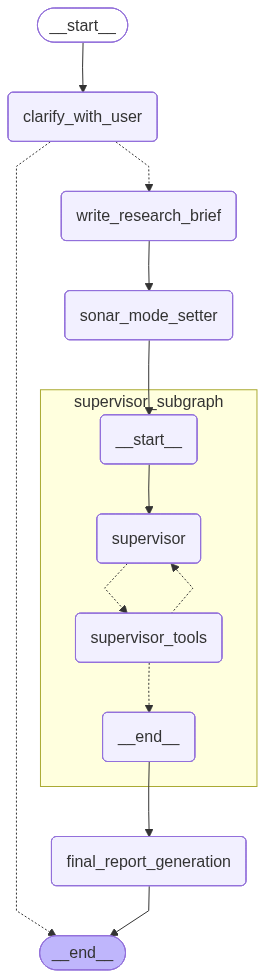

In [7]:
from deep_research_with_langgraph.research_with_sonar_full import sonar_research_builder
from langgraph.checkpoint.memory import InMemorySaver
from IPython.display import Image

checkpointer = InMemorySaver()
full_agent = sonar_research_builder.compile(checkpointer=checkpointer)
display(Image(full_agent.get_graph(xray=True).draw_mermaid_png()))

In [8]:
from langchain_core.messages import HumanMessage
from uuid import uuid4
thread = {"configurable": {"thread_id": str(uuid4()), "recursion_limit": 50}}
report_result = await full_agent.ainvoke({"messages": [HumanMessage(content="Analyze the impact of generative AI on software engineering productivity in 2026. Provide statistics and case studies from top tech firms.")]}, config=thread)


In [9]:
from IPython.display import display, Markdown
Markdown(report_result["messages"][-1].content)

Here is the final report:

# Impact of Generative AI on Software Engineering Productivity in 2026

## Introduction

Generative AI has become a transformative force in software engineering, significantly impacting productivity, development processes, and team dynamics. This report explores the quantitative and qualitative effects of generative AI on software engineering productivity in 2026, with a focus on leading tech firms such as Google, Microsoft, and Amazon. It also examines broader implications for software development processes and team dynamics.

## Quantitative Impacts on Productivity

Generative AI tools have led to substantial productivity improvements in software engineering. Studies from 2023 to 2025 indicate an average increase of 26% in task completion rates, with junior developers experiencing gains of 27-39% and senior developers 8-13%[1][2][3]. High-adoption teams report a 21% increase in tasks completed and a 98% rise in pull requests merged, although pull request review times have increased by 91%[4].

- **Task and Output Increases**: AI coding assistants have raised weekly task completion by 26%, with a 56% faster speed in JavaScript programming[1][2].
- **Experience-Based Gains**: Junior developers have seen output increases of 27-39%, while experienced developers have gained 8-13%[1][3].
- **Broader Business Productivity**: Generative AI adoption has resulted in a 24.69% increase in productivity and 15.7% cost savings across various functions[5].

## Qualitative Case Studies

### Google

Google has integrated generative AI into its software engineering processes, although detailed qualitative case studies are limited. The Google Dev AI UX team developed an internal tool to enhance developer velocity using generative AI, focusing on UX design for developer flow state[6]. Google Cloud customers have used tools like Gemini Code Assist to boost productivity, but internal qualitative insights are sparse[7].

### Microsoft

Microsoft has extensively implemented generative AI through tools like GitHub Copilot, resulting in significant productivity gains. Nykaa reported a 20% productivity boost by automating repetitive tasks, while Wipro streamlined code writing with GitHub Copilot and Azure OpenAI[8]. Research-backed findings indicate that less-experienced developers show higher productivity gains with generative AI tools[9].

### Amazon

Amazon's internal use of generative AI in software engineering is less documented, but external customers have reported productivity improvements using Amazon's AI tools. For instance, DTCC achieved 40% faster development with Amazon Q Developer, and nnamu reduced development time by 30%[10]. Amazon's tools like CodeWhisperer and Bedrock are used for code generation and refactoring, but detailed internal case studies are lacking[11].

## Broader Implications for Software Development Processes

Generative AI is reshaping software development processes by automating repetitive tasks, improving code quality, and accelerating debugging. The shift towards agentic systems and composable architectures is evident, with AI handling multiple development phases beyond code generation[12]. However, the rapid acceleration of code generation has introduced challenges such as increased technical debt and security risks[13].

## Effects on Team Dynamics

Generative AI is altering team dynamics by shifting the focus from routine coding tasks to higher-level problem-solving and architectural design. Teams without the skills to audit machine-generated logic may face vulnerabilities, while those treating AI as a partner gain a competitive advantage[14]. The competence gap between teams is widening, emphasizing the need for continuous skill development.

## Conclusion

Generative AI is significantly enhancing software engineering productivity, with notable gains in task completion rates and broader business productivity. While Microsoft provides detailed qualitative insights into the impact of generative AI, Google and Amazon's internal use cases are less documented. The broader implications for software development processes include automation, architectural shifts, and emerging challenges related to code quality and security. As AI continues to evolve, its integration into software engineering will require careful management to maximize benefits and mitigate risks.

### Sources

[1] MIT Sloan - How Generative AI Affects Highly Skilled Workers: https://mitsloan.mit.edu/ideas-made-to-matter/how-generative-ai-affects-highly-skilled-workers  
[2] Wharton Budget Model - Projected Impact of Generative AI on Future Productivity Growth: https://budgetmodel.wharton.upenn.edu/issues/2025/9/8/projected-impact-of-generative-ai-on-future-productivity-growth  
[3] Harvard Business Review - AI Tools Make Coders More Important, Not Less: https://hbr.org/2025/12/ai-tools-make-coders-more-important-not-less  
[4] Faros AI Blog - AI Software Engineering: https://www.faros.ai/blog/ai-software-engineering  
[5] Master of Code Blog - Generative AI Statistics: https://masterofcode.com/blog/generative-ai-statistics  
[6] People + AI Guidebook - Google Dev AI UX Team Case Studies: https://pair.withgoogle.com/guidebook/case-studies  
[7] Google Cloud Transform - 101 Real World Generative AI Use Cases from Industry Leaders: https://cloud.google.com/transform/101-real-world-generative-ai-use-cases-from-industry-leaders  
[8] Digital Defynd - Generative AI Case Studies: https://digitaldefynd.com/IQ/generative-ai-case-studies/  
[9] MIT Sloan - How Generative AI Affects Highly Skilled Workers: https://mitsloan.mit.edu/ideas-made-to-matter/how-generative-ai-affects-highly-skilled-workers  
[10] AWS Case Study - DTCC: https://aws.amazon.com/solutions/case-studies/dtcc-case-study/  
[11] AWS Generative AI Customers: https://aws.amazon.com/ai/generative-ai/customers/  
[12] Software Development in 2026: Curing AI Party Hangover: https://www.developer-tech.com/news/software-development-in-2026-curing-ai-party-hangover/  
[13] AI Software Development 2026: Vibe Coding & Security: https://www.itpro.com/software/development/ai-software-development-2026-vibe-coding-security  
[14] Impact of AI on Software Development: https://zaigoinfotech.com/blogs/impact-of-ai-on-software-development  